# Data Mining -  Final Project

Customer Segmentation for Insurance Company.

Authors : Juan Camilo Díaz (20190680), María Fernanda Restrepo (20190679)

Date    : January 7th 2020

In this report we present the code used in the Final Project report. This code is divided in three parts:

1. Data Preparation: In this section we did an exploratory data analysis, data cleaning and validation.

2. Data preprocesing: In this section we proposed new features, standarized and reduced dimension of the data.

3. Cluster Analysis: In this section we applied the clustering algorithms and made analysis.

## Importing libraries

In [6]:
#Importing libraries

import pandas as pd
import numpy as np
import sqlite3
import scipy
import seaborn as sb
import pydotplus
import sklearn.metrics as sm
from matplotlib import pyplot as plt
from sklearn import cluster
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
from kmodes.kmodes import KModes
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster import hierarchy
from pylab import rcParams

## 1. Data preparation

This section contains an exploratory data analysis, data cleaning and validation.

In [7]:
#Importing and reading the data set

my_path = '/Users/Mafe/Google Drive/Académico/Universidade Nova de Lisboa/2019-2/Data Mining/Project/insurance.db'

conn = sqlite3.connect(my_path)
cursor = conn.cursor()
query = """
    SELECT 
        A.'Customer Identity' AS 'CUST_ID'
        , A.'First Policy´s Year' AS 'FIRST_PLCY_YR'
        , A.'brithday year' AS 'BDAY_YR'
        , A.'educational degree' AS 'EDUC_DGR'
        , A.'gross monthly salary' AS 'GROSS_MNT_SLRY'
        , A.'geographic living area' AS 'GEO_LIV_AREA'
        , A.'has children (y=1)' AS 'CHILDREN'
        , A.'customer monetary value' AS 'CMV'
        , A.'claims rate' AS 'CLAIMS_RATE'
        , B.'premiums in lob: motor' AS 'PRM_MOTOR'
        , B.'premiums in lob: household' AS 'PRM_HOUSE'
        , B.'premiums in lob: health' AS 'PRM_HEALTH'
        , B.'premiums in lob:  life' AS 'PRM_LIFE'
        , B.'premiums in lob: work compensations' AS 'PRM_WORK_COMP'
    FROM Engage A
    LEFT JOIN LOB B
    ON A.'Customer Identity' = B.'Customer Identity'
;
"""
df = pd.read_sql_query(query, conn)
df.head()

CUST_ID  FIRST_PLCY_YR  BDAY_YR         EDUC_DGR  GROSS_MNT_SLRY  \
0        1         1985.0   1982.0  2 - High School          2177.0   
1        2         1981.0   1995.0  2 - High School           677.0   
2        3         1991.0   1970.0        1 - Basic          2277.0   
3        4         1990.0   1981.0      3 - BSc/MSc          1099.0   
4        5         1986.0   1973.0      3 - BSc/MSc          1763.0   

   GEO_LIV_AREA  CHILDREN     CMV  CLAIMS_RATE  PRM_MOTOR  PRM_HOUSE  \
0           1.0       1.0  380.97         0.39     375.85      79.45   
1           4.0       1.0 -131.13         1.12      77.46     416.20   
2           3.0       0.0  504.67         0.28     206.15     224.50   
3           4.0       1.0  -16.99         0.99     182.48      43.35   
4           4.0       1.0   35.23         0.90     338.62      47.80   

   PRM_HEALTH  PRM_LIFE  PRM_WORK_COMP  
0      146.36     47.01          16.89  
1      116.69    194.48         106.13  
2      124.58     86.35          99.02  
3      311.17     35.34          28.34  
4      182.59     18.78          41.45

In [8]:
# Dimension of the data set

df.shape

(10296, 14)

### 1.1 Exploratory data analysis

In [13]:
# General description of continuous variables

round(df[['GROSS_MNT_SLRY', 'CMV', 'CLAIMS_RATE', 'PRM_MOTOR', 'PRM_HOUSE', 'PRM_HEALTH', 'PRM_LIFE', 'PRM_WORK_COMP']].describe(),0)

GROSS_MNT_SLRY       CMV  CLAIMS_RATE  PRM_MOTOR  PRM_HOUSE  \
count         10260.0   10296.0      10296.0    10262.0    10296.0   
mean           2507.0     178.0          1.0      300.0      210.0   
std            1157.0    1946.0          3.0      212.0      353.0   
min             333.0 -165680.0          0.0       -4.0      -75.0   
25%            1706.0      -9.0          0.0      191.0       49.0   
50%            2502.0     187.0          1.0      299.0      133.0   
75%            3290.0     400.0          1.0      408.0      290.0   
max           55215.0   11876.0        256.0    11604.0    25049.0   

       PRM_HEALTH  PRM_LIFE  PRM_WORK_COMP  
count     10253.0   10192.0        10210.0  
mean        172.0      42.0           41.0  
std         296.0      47.0           52.0  
min          -2.0      -7.0          -12.0  
25%         112.0      10.0           11.0  
50%         163.0      26.0           26.0  
75%         220.0      58.0           57.0  
max       28272.0     398.0         1989.0

In [10]:
# Some description of continuous variables for each categorical variables

# Education Degree:

df.groupby('EDUC_DGR')['GROSS_MNT_SLRY', 'CMV', 'CLAIMS_RATE', 'PRM_MOTOR', 'PRM_HOUSE', 'PRM_HEALTH', 'PRM_LIFE', 'PRM_WORK_COMP'].mean()

GROSS_MNT_SLRY         CMV  CLAIMS_RATE   PRM_MOTOR  \
EDUC_DGR                                                               
1 - Basic           1981.905213  275.459843     0.694536  170.369164   
2 - High School     2512.059395  192.202832     0.727282  262.692210   
3 - BSc/MSc         2616.884285  139.087660     0.777950  348.357761   
4 - PhD             2664.512195  193.358653     0.670100  398.823482   

                  PRM_HOUSE  PRM_HEALTH   PRM_LIFE  PRM_WORK_COMP  
EDUC_DGR                                                           
1 - Basic        431.175708  161.828698  86.914688      86.194256  
2 - High School  257.251111  186.935019  51.289570      50.031778  
3 - BSc/MSc      137.959783  166.919329  26.685545      26.629802  
4 - PhD           73.043553  144.172968  15.351747      15.379390

In [11]:
# Geographic Living Area:

df.groupby('GEO_LIV_AREA')['GROSS_MNT_SLRY', 'CMV', 'CLAIMS_RATE', 'PRM_MOTOR', 'PRM_HOUSE', 'PRM_HEALTH', 'PRM_LIFE', 'PRM_WORK_COMP'].mean()

GROSS_MNT_SLRY         CMV  CLAIMS_RATE   PRM_MOTOR   PRM_HOUSE  \
GEO_LIV_AREA                                                                    
1.0              2474.074038  188.194915     0.717631  297.516515  207.158678   
2.0              2562.561591  210.906071     0.686921  300.917398  205.804344   
3.0              2481.960641  170.404724     0.771864  311.998373  205.153485   
4.0              2528.740257  165.852454     0.760647  296.753064  216.681423   

              PRM_HEALTH   PRM_LIFE  PRM_WORK_COMP  
GEO_LIV_AREA                                        
1.0           168.300079  41.589065      40.911280  
2.0           167.394374  40.301824      40.081002  
3.0           184.200563  41.092247      42.960962  
4.0           168.748790  42.826192      41.014237

In [10]:
# Children:

df.groupby('CHILDREN')['GROSS_MNT_SLRY', 'CMV', 'CLAIMS_RATE', 'PRM_MOTOR', 'PRM_HOUSE', 'PRM_HEALTH', 'PRM_LIFE', 'PRM_WORK_COMP'].mean()

GROSS_MNT_SLRY         CMV  CLAIMS_RATE   PRM_MOTOR   PRM_HOUSE  \
CHILDREN                                                                    
0.0          3214.329118  180.701185     0.752871  249.113128  245.012795   
1.0          2213.055018  176.732893     0.738750  321.729739  196.171502   

          PRM_HEALTH   PRM_LIFE  PRM_WORK_COMP  
CHILDREN                                        
0.0       201.735093  50.445216      48.121839  
1.0       159.114175  38.326119      38.440100

In [24]:
# Some information about type of variables

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10296 entries, 0 to 10295
Data columns (total 14 columns):
CUST_ID           10296 non-null int64
FIRST_PLCY_YR     10266 non-null float64
BDAY_YR           10279 non-null float64
EDUC_DGR          10279 non-null object
GROSS_MNT_SLRY    10260 non-null float64
GEO_LIV_AREA      10295 non-null float64
CHILDREN          10275 non-null float64
CMV               10296 non-null float64
CLAIMS_RATE       10296 non-null float64
PRM_MOTOR         10262 non-null float64
PRM_HOUSE         10296 non-null float64
PRM_HEALTH        10253 non-null float64
PRM_LIFE          10192 non-null float64
PRM_WORK_COMP     10210 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 1.1+ MB


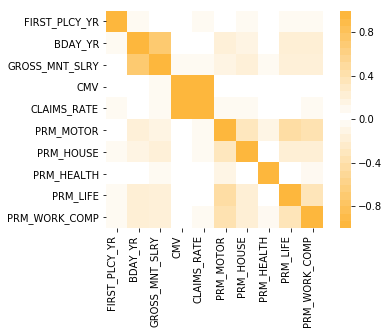

In [15]:
# Heatmap of linear correlation between variables

# Computing the correlation

corr = df[['FIRST_PLCY_YR', 'BDAY_YR', 'GROSS_MNT_SLRY',
       'CMV', 'CLAIMS_RATE', 'PRM_MOTOR',
       'PRM_HOUSE', 'PRM_HEALTH', 'PRM_LIFE', 'PRM_WORK_COMP']].corr()

# Graphing the heatmap

gradient =  ["#FDB73D", "#FDBB49", "#FDC056", "#FDC563", "#FDCA70", "#FDCF7D", "#FDD38A", "#FDD897", "#FEDDA4", "#FEE2B1", "#FEE7BE", "#FEEBCB", "#FEF0D8", "#FEF5E5", "#FEFAF2", "#FFFFFF", "#FEF9F1", "#FEF4E3", "#FEEFD5", "#FEEAC7", "#FEE5B9", "#FEE0AB", "#FEDB9E", "#FDD590", "#FDD082", "#FDCB74", "#FDC666", "#FDC158", "#FDBC4A", "#FDB73D"]
ax = sb.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sb.color_palette(gradient),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right')

plt.savefig('Correlation.png', transparent=True)

### 1.2 Detecting outliers

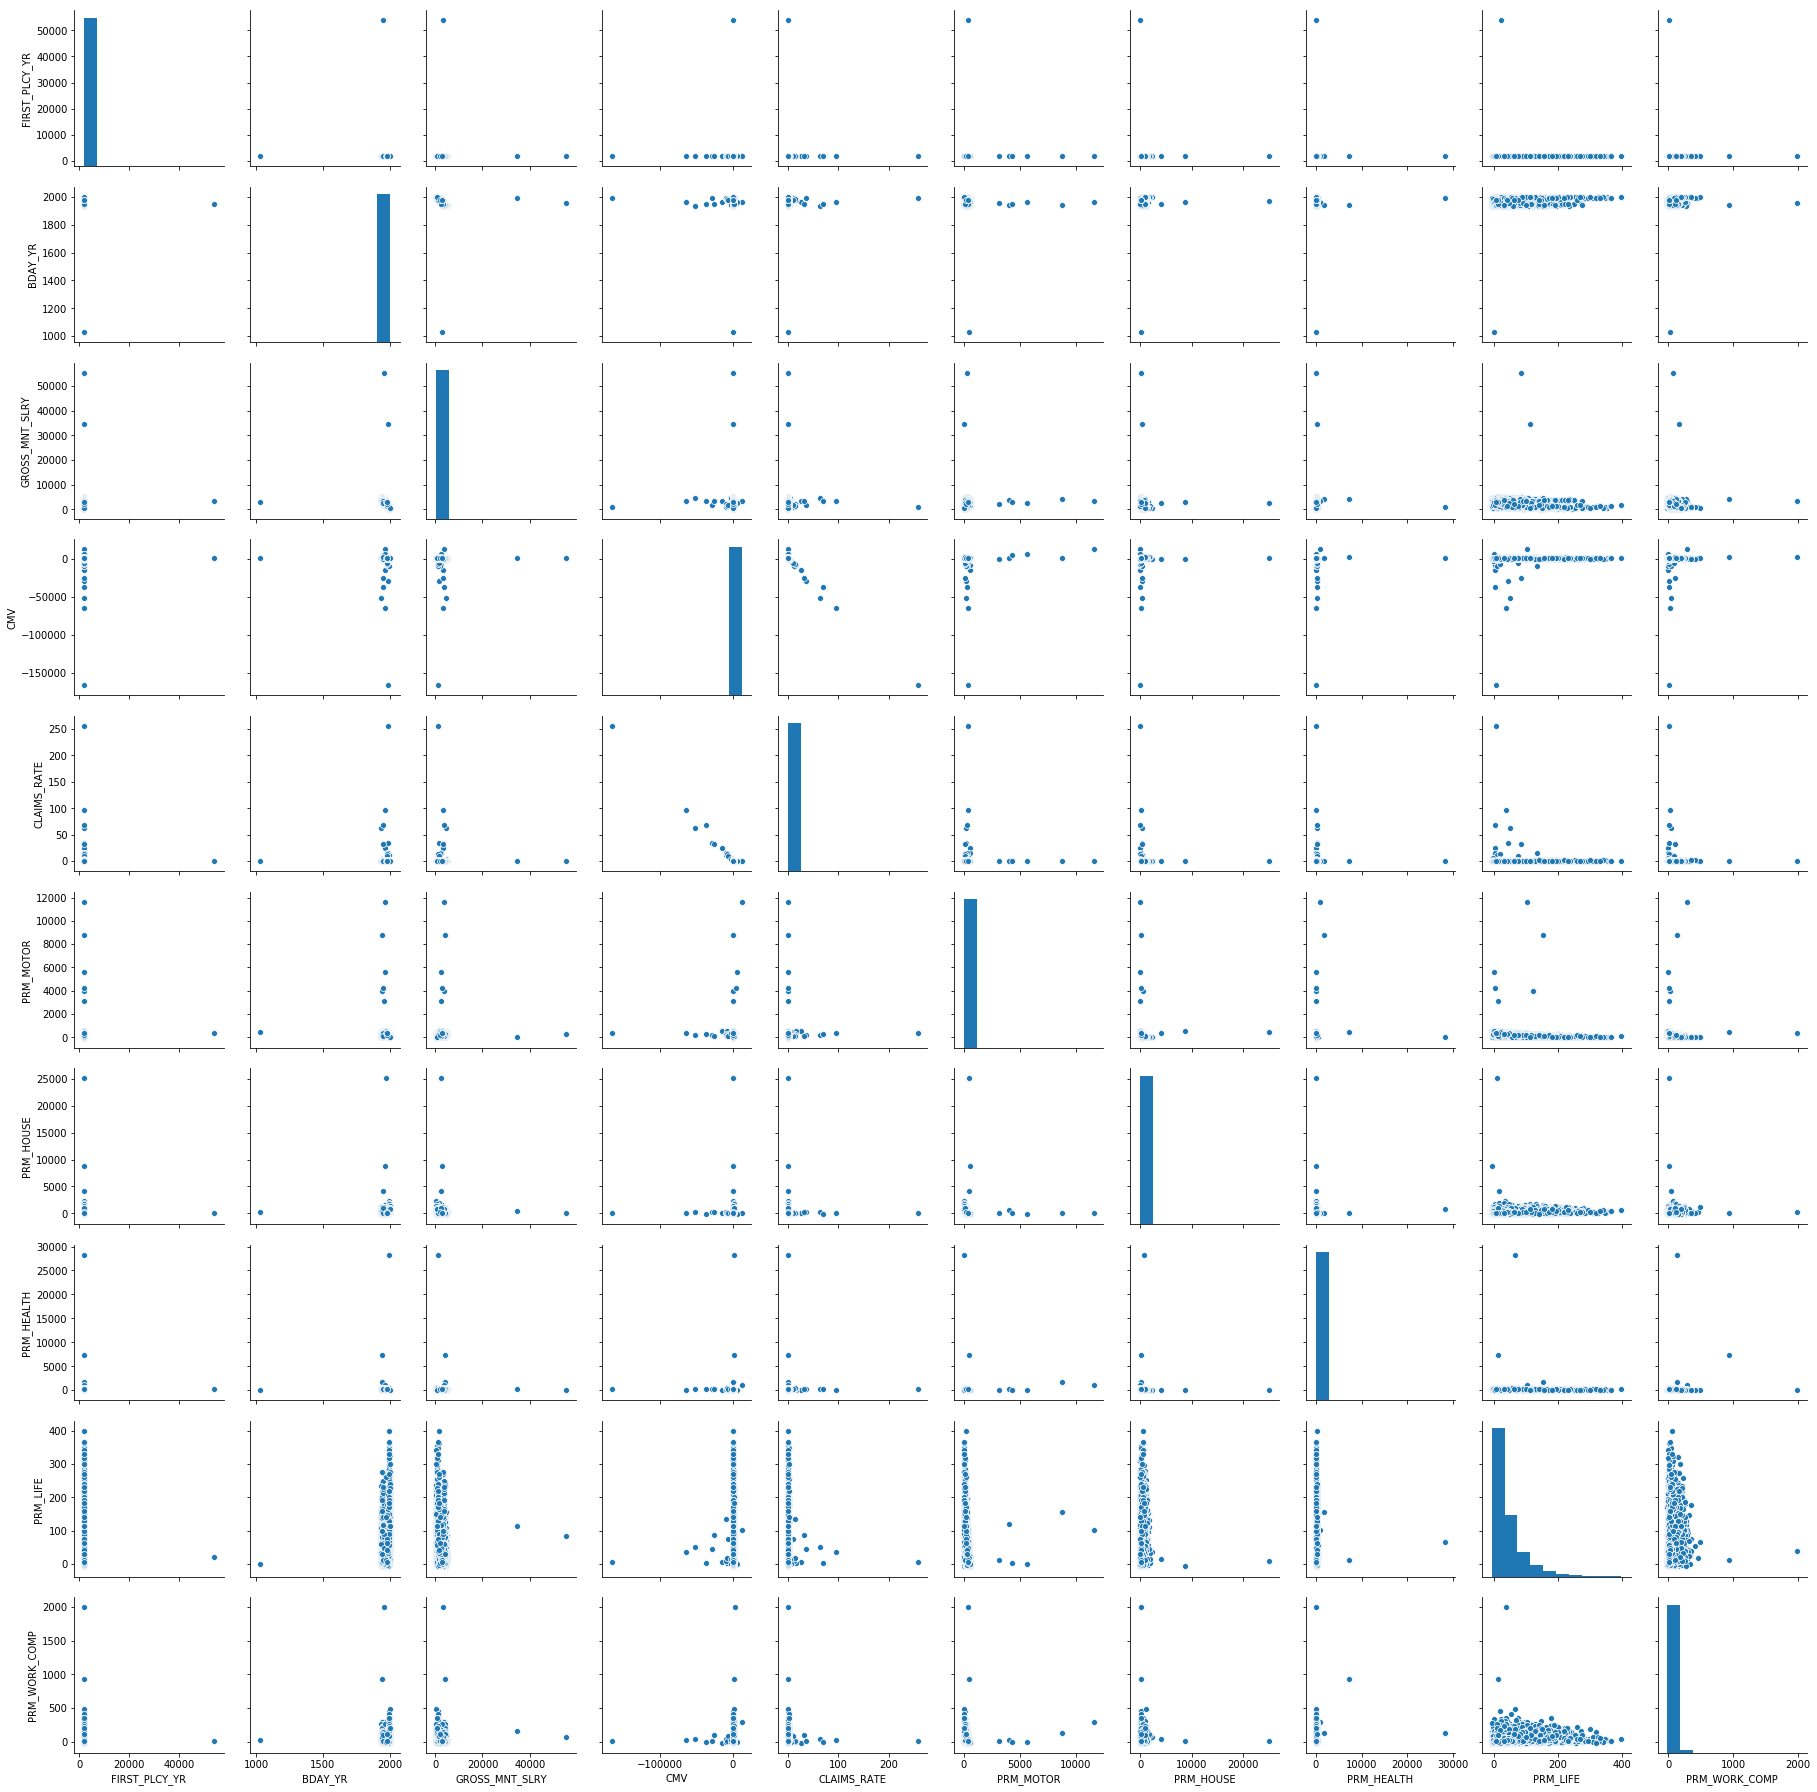

In [18]:
# Panel of pairplot for detecting unusual observations and outliers
# The graph shows the presence of multiple outliers in most of the variables

sb.pairplot(df[['FIRST_PLCY_YR', 'BDAY_YR', 'GROSS_MNT_SLRY',
       'CMV', 'CLAIMS_RATE', 'PRM_MOTOR',
       'PRM_HOUSE', 'PRM_HEALTH', 'PRM_LIFE', 'PRM_WORK_COMP']].dropna())

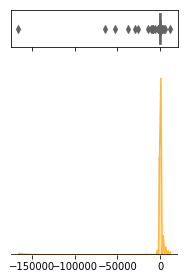

In [20]:
# Graphing the distribution of the variable 'CMV' to test if it present outliers.
# The box plot and histogram reveals the precense of outliers.

# Cut the window in 2 parts

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .75)})
f.set_size_inches(3, 4.5)

# Add a graph in each part
sb.boxplot(df['CMV'].dropna(), ax=ax_box, color='#ffbd4a')
sb.distplot(df['CMV'].dropna(), ax=ax_hist, color='#fdb73d')
 
# Remove y axis 
ax_box.set(xlabel='')
ax_box.set(ylabel='')
ax_hist.set(xlabel='')
ax_hist.set(ylabel='')
ax_hist.set_frame_on(False)
ax_hist.axhline(0,color='black')
ax_hist.set(yticklabels=[], yticks=[])
ax_box.set(yticklabels=[], yticks=[])

plt.savefig('CMV_w_outliers.png', transparent=True)

In [33]:
# Trying to identify these outliers with the rule of Interquartile Range (IQR)

q1= df.CMV.dropna().quantile(0.25)
q3= df.CMV.dropna().quantile(0.75)
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)
df[(df['CMV']<=lower_bound)|(df['CMV']>=upper_bound)]

CUST_ID  FIRST_PLCY_YR  BDAY_YR         EDUC_DGR  GROSS_MNT_SLRY  \
51          52         1982.0   1966.0      3 - BSc/MSc          3234.0   
112        113         1997.0   1979.0          4 - PhD          2354.0   
135        136         1997.0   1988.0      3 - BSc/MSc          2176.0   
171        172         1990.0   1989.0      3 - BSc/MSc          1086.0   
257        258         1991.0   1995.0      3 - BSc/MSc           380.0   
265        266         1997.0   1990.0      3 - BSc/MSc           881.0   
301        302         1976.0   1991.0        1 - Basic          1497.0   
600        601         1986.0   1991.0        1 - Basic           789.0   
628        629         1989.0   1994.0        1 - Basic           967.0   
649        650         1991.0   1973.0        1 - Basic          1688.0   
655        656         1974.0   1963.0      3 - BSc/MSc          3279.0   
675        676         1994.0   1937.0  2 - High School          4435.0   
698        699         1975.0   1993.0        1 - Basic           382.0   
707        708         1991.0   1991.0      3 - BSc/MSc          1634.0   
758        759         1988.0   1992.0      3 - BSc/MSc          1117.0   
793        794         1980.0   1983.0      3 - BSc/MSc          1370.0   
851        852         1974.0   1994.0        1 - Basic           695.0   
865        866         1979.0   2001.0        1 - Basic           562.0   
908        909         1981.0   1990.0      3 - BSc/MSc          1917.0   
917        918         1986.0   1952.0  2 - High School          3355.0   
951        952         1998.0   1976.0      3 - BSc/MSc          1586.0   
982        983         1989.0   1981.0  2 - High School          1771.0   
1025      1026         1988.0   1939.0      3 - BSc/MSc          4566.0   
1097      1098         1988.0   1990.0        1 - Basic           854.0   
1188      1189         1981.0   1992.0  2 - High School          1662.0   
1194      1195         1989.0   1997.0        1 - Basic           574.0   
1330      1331         1992.0   1992.0        1 - Basic          1535.0   
1471      1472         1980.0   1999.0        1 - Basic          1179.0   
1859      1860         1997.0   1996.0        1 - Basic          1159.0   
1937      1938         1990.0   1954.0  2 - High School          3735.0   
...        ...            ...      ...              ...             ...   
8175      8176         1996.0   1995.0        1 - Basic          1254.0   
8188      8189         1996.0   1995.0      3 - BSc/MSc           779.0   
8226      8227         1977.0   1997.0        1 - Basic           428.0   
8286      8287         1981.0   1998.0  2 - High School          1379.0   
8366      8367         1981.0   1995.0        1 - Basic          1094.0   
8468      8469         1979.0   1950.0  2 - High School          3783.0   
8591      8592         1988.0   1968.0        1 - Basic          2509.0   
8606      8607         1992.0   1995.0      3 - BSc/MSc          1890.0   
8667      8668         1981.0   1997.0        1 - Basic          1421.0   
8700      8701         1993.0   1999.0        1 - Basic          1141.0   
8756      8757         1983.0   1994.0        1 - Basic          1105.0   
8794      8795         1988.0   1999.0        1 - Basic          1010.0   
8807      8808         1992.0   2000.0        1 - Basic           358.0   
8962      8963         1978.0   2001.0        1 - Basic          1117.0   
8998      8999         1986.0   1995.0        1 - Basic          1390.0   
9235      9236         1997.0   1998.0        1 - Basic           566.0   
9255      9256         1989.0   1993.0        1 - Basic          1398.0   
9448      9449         1994.0   1991.0  2 - High School          1066.0   
9557      9558         1988.0   2000.0        1 - Basic           808.0   
9562      9563         1998.0   1997.0        1 - Basic           886.0   
9635      9636         1994.0   1952.0  2 - High School          3757.0   
9645      9646         1981.0   

In [21]:
# Dropping these outliers from the data set

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(8833, 14)

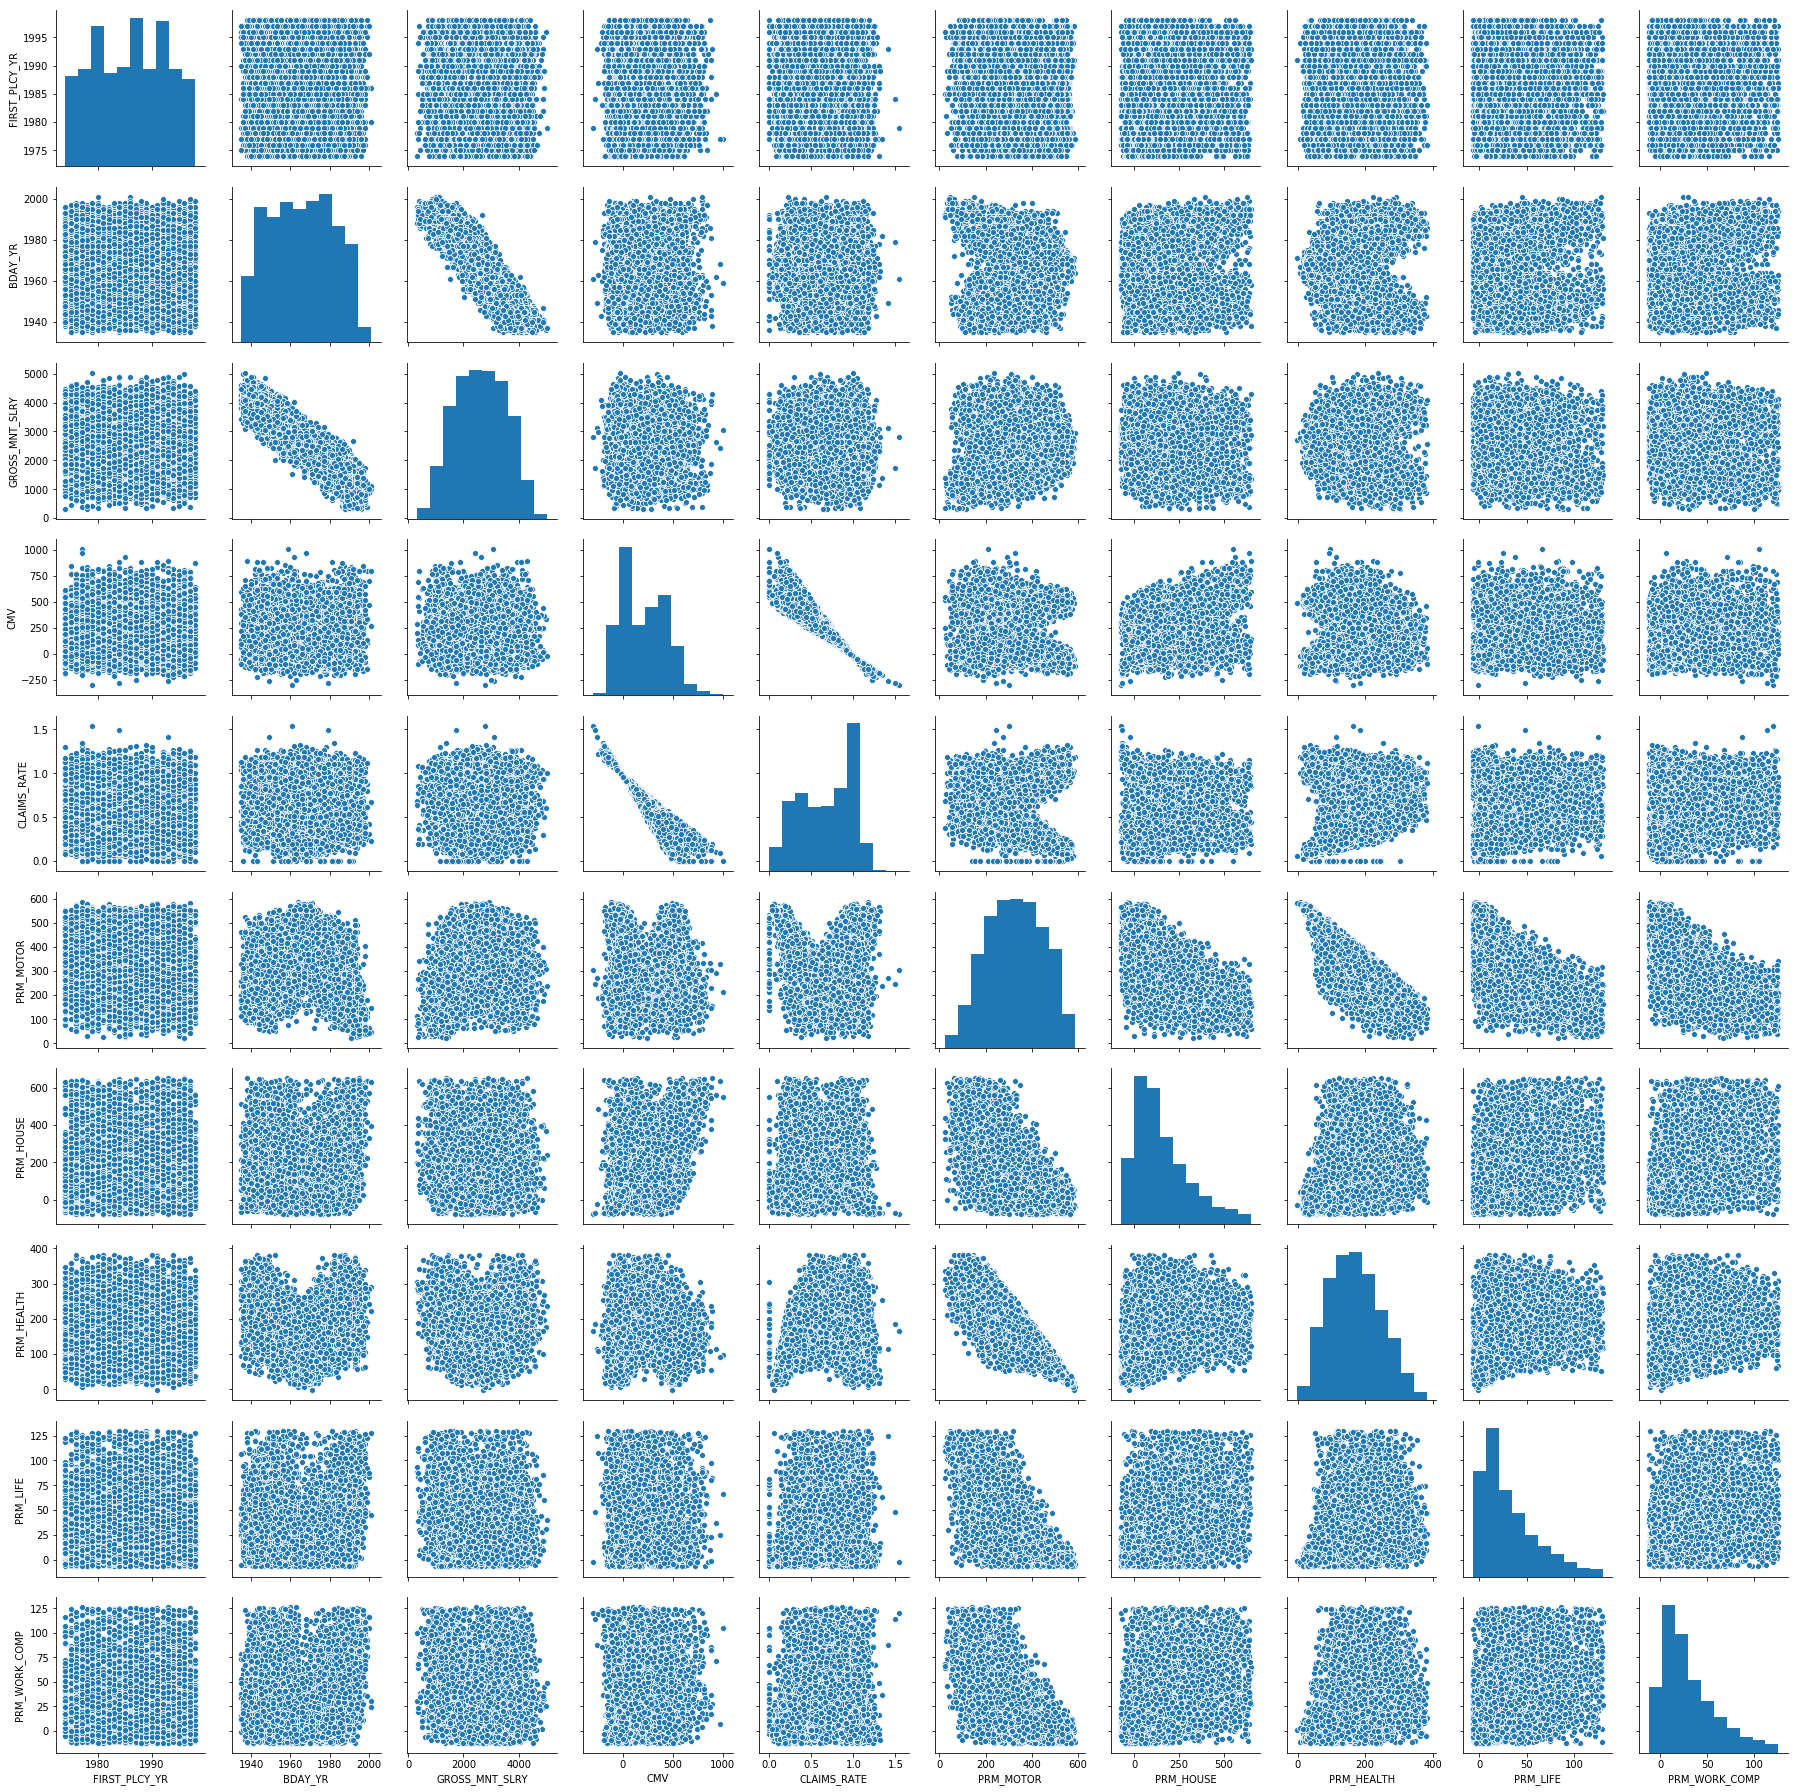

In [22]:
# Checking again the pairplot for detecting unusual observations and outliers
# The graph shows that the outliers have been eliminated

sb.pairplot(df[['FIRST_PLCY_YR', 'BDAY_YR', 'GROSS_MNT_SLRY',
       'CMV', 'CLAIMS_RATE', 'PRM_MOTOR',
       'PRM_HOUSE', 'PRM_HEALTH', 'PRM_LIFE', 'PRM_WORK_COMP']].dropna())

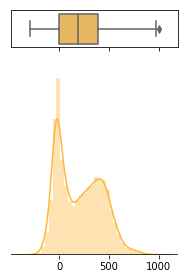

In [23]:
# Checking again the variable 'CMV' to test if it present outliers.
# The box plot and histogram reveals that the outliers have been eliminated.

# Cut the window in 2 parts

f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .75)})
f.set_size_inches(3, 4.5)

# Add a graph in each part
sb.boxplot(df['CMV'].dropna(), ax=ax_box, color='#ffbd4a')
sb.distplot(df['CMV'].dropna(), ax=ax_hist, color='#fdb73d')
 
# Remove y axis 
ax_box.set(xlabel='')
ax_box.set(ylabel='')
ax_hist.set(xlabel='')
ax_hist.set(ylabel='')
ax_hist.set_frame_on(False)
ax_hist.axhline(0,color='black')
ax_hist.set(yticklabels=[], yticks=[])
ax_box.set(yticklabels=[], yticks=[])

plt.savefig('CMV_w_outliers.png', transparent=True)

### 1.3 Dealing with missing values

In [29]:
# Check number of nans in each column 

print(f"\nTotal number of nan: {(df.isna().sum(axis=0).sum())}")
praon = round((df.isna().sum(axis=1).sum() / len(df)) * 100,1)
print(f"\nPercentage of rows rows with at least one NaN: {praon}% ({df.isna().sum(axis=1).sum()})")
print(f"\nNans by variable -->")
print(df.isna().sum(axis=0))


Total number of nan: 366

Percentage of rows rows with at least one NaN: 4.1% (366)

Nans by variable -->
CUST_ID             0
FIRST_PLCY_YR      28
BDAY_YR            15
EDUC_DGR           16
GROSS_MNT_SLRY     34
GEO_LIV_AREA        1
CHILDREN           19
CMV                 0
CLAIMS_RATE         0
PRM_MOTOR          31
PRM_HOUSE           0
PRM_HEALTH         39
PRM_LIFE          102
PRM_WORK_COMP      81
dtype: int64


In [30]:
# Since there are few missing values and we don't consider that it can be completed, we decided to drop them.

df=df.dropna()
df.shape

(8544, 14)

### 1.4 Data Validation

In [32]:
# Data Validation

# (Business Logic Checks)
# * The Gross Monthly Salary should be greater than 0
# * The first policy year should be greater than the birth year
# * Claims rate cannot be negative?
# * Age must be less that 100 year. (i.e. 1916)
# * Age of Customer's first policy should be less or equal than 2016

print(f"\nData Validation:")
print(f"\nTotal registers with Gross Monthly Salary less than 0: {df[df['GROSS_MNT_SLRY']<0].shape[0]}")
print(f"\nTotal registers with first policy year less than the birth year: {df[df['FIRST_PLCY_YR']<df['BDAY_YR']].shape[0]}")
print(f"\nTotal registers with negative Claims rate: {df[df['CLAIMS_RATE']<0].shape[0]}")
print(f"\nTotal registers with birth date less than 1916: {df[df['BDAY_YR']<1916].shape[0]}")
print(f"\nTotal registers with first policy year grater than 2016: {df[df['FIRST_PLCY_YR']>2016].shape[0]}")
print(f"\nPercentage of invalidate data: {(df[df['FIRST_PLCY_YR']<df['BDAY_YR']].shape[0]+df[df['BDAY_YR']<1916].shape[0]+df[df['FIRST_PLCY_YR']>2016].shape[0])/df.shape[0]}")


Data Validation:

Total registers with Gross Monthly Salary less than 0: 0

Total registers with first policy year less than the birth year: 1125

Total registers with negative Claims rate: 0

Total registers with birth date less than 1916: 0

Total registers with first policy year grater than 2016: 0

Percentage of invalidate data: 0.13167134831460675


As we can see, there are 1125 registers with a first policy year prior less that the birth date. We decided to drop this registers.

In [34]:
# As we can see, there are 1125 registers with a first policy year prior less that the birth date. 
# We decided to drop this registers.

df=df[df['FIRST_PLCY_YR']>df['BDAY_YR']]
df.shape

(7292, 14)

## 2. Data preprocessing

In this section we propose new features, standarized and reduced dimension of the data.

### 2.1 New Features Creation

In [44]:
# CUST_AGE      : Age of customer (base 2016)
# TIME_FRST_CNT : Time in years since the first contact with the company, first policy.
# TOT_PRM       : Total Annual Premiums (2016) 
# INACTIVE_XX   : <For each XX -> LOB> (1 : Customer Inactive (Canceled the product this year) , 0 : Customer Active)

# Age of customer (Current date = 2016)
current_yr = 2016
df["CUST_AGE"] = current_yr - df["BDAY_YR"]

# Time in years since the first contact with the company
df["TIME_FRST_CNT"] = current_yr - df["FIRST_PLCY_YR"]

# Customer Canceled (1 : Customer Inactive (Canceled the producto this year) , 0 : Customer Active)
df["INACTIVE_MOTOR"]     = df["PRM_MOTOR"].map(lambda x : 0 if x >= 0 else 1)
df["INACTIVE_HOUSE"]     = df["PRM_HOUSE"].map(lambda x : 0 if x >= 0 else 1)
df["INACTIVE_HEALTH"]    = df["PRM_HEALTH"].map(lambda x : 0 if x >= 0 else 1)
df["INACTIVE_LIFE"]      = df["PRM_LIFE"].map(lambda x : 0 if x >= 0 else 1)
df["INACTIVE_WORK_COMP"] = df["PRM_WORK_COMP"].map(lambda x : 0 if x >= 0 else 1)

# Number of inactive products
df["INACTIVE_ONE_LOB"]   = df[["INACTIVE_MOTOR", "INACTIVE_HOUSE", "INACTIVE_HEALTH", "INACTIVE_LIFE", "INACTIVE_WORK_COMP"]].sum(axis=1)

# Customer is inactive in at least one LOB
df["INACTIVE_TOTAL"] = df["INACTIVE_ONE_LOB"].map(lambda x : 1 if x>0 else 0)

# Total Annual Premiums (2016)
df["TOT_PRM"] = df["PRM_MOTOR"] + df["PRM_HOUSE"] + df["PRM_HEALTH"] + df["PRM_LIFE"] + df["PRM_WORK_COMP"]

In [45]:
print("\nNumber of cancelations by LOB ---> \n")
df[["INACTIVE_MOTOR", "INACTIVE_HOUSE", "INACTIVE_HEALTH", "INACTIVE_LIFE", "INACTIVE_WORK_COMP", "INACTIVE_ONE_LOB", "INACTIVE_TOTAL"]].sum()


Number of cancelations by LOB ---> 



INACTIVE_MOTOR           0
INACTIVE_HOUSE         920
INACTIVE_HEALTH          1
INACTIVE_LIFE          587
INACTIVE_WORK_COMP     781
INACTIVE_ONE_LOB      2289
INACTIVE_TOTAL        1868
dtype: int64

### 2.2 Identifying informative attributes/features

In [46]:
# Defining the variables that are going to be used in the segmentation

# Continuous variables

df=df.reset_index(drop=True)
cont_var=df.loc[:, ['GROSS_MNT_SLRY', 'CMV', 'TOT_PRM', 'CUST_AGE']]
     
# Discrete variables

disc_var=df.loc[:, ['EDUC_DGR', 'GEO_LIV_AREA', 'CHILDREN']]

### 2.3 Data standardization

In [50]:
# Standarize continuos variables

cont_var_std = StandardScaler().fit_transform(cont_var)

### 2.4 Dimensionality reduction

In [51]:
# We used Principal Component Analysis (PCA) to dimensionality reduction

# Create a PCA instance: pca

pca = PCA(n_components=cont_var_std.shape[1])
principalComponents = pca.fit_transform(cont_var_std)

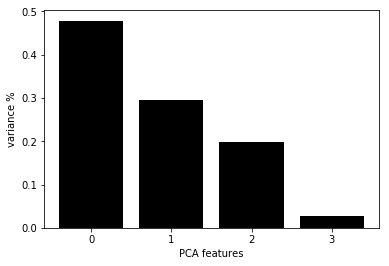

In [52]:
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

In [105]:
pca.explained_variance_ratio_

array([0.47869901, 0.2958959 , 0.19907506, 0.02633003])

Text(0, 0.5, 'PCA 2')

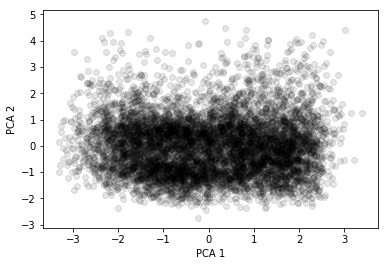

In [53]:
plt.scatter(PCA_components[0], PCA_components[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

## 3. Cluster Analysis

In this section we implement the cluster algorithms and then analyses them.

### 3.1 K-Means

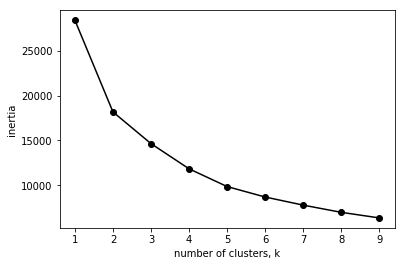

In [55]:
# Elbow graph to identify the number of clusters

ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

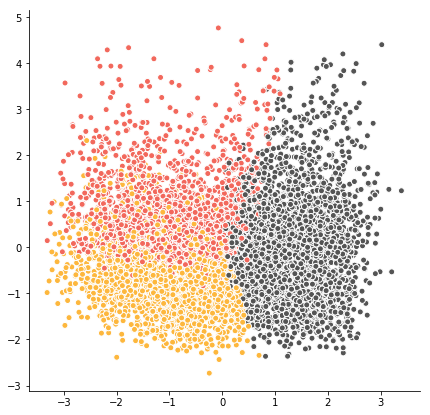

In [56]:
# Running K-means for 3 clusters and graphing the groups

kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(PCA_components.iloc[:,:3])

paletteColors = ['#545454','#fdb73d', '#f2685c' ,'#ff914d']
colorsCl = [paletteColors[i] for i in kmeans.labels_]

plt.figure(figsize=(7, 7))
plt.scatter(PCA_components[0], PCA_components[1], c=colorsCl, cmap='rainbow', edgecolors='w')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('ClustersK-means.png', transparent=True)

In [57]:
# Saving the results in a data frame and checking the number of customers for each cluster

clus_kmeans=pd.DataFrame(pred_y)
clus_kmeans.columns=['Clusters_kmeans']
clus_kmeans.groupby('Clusters_kmeans')['Clusters_kmeans'].count()

Clusters_kmeans
0    3118
1    2149
2    2025
Name: Clusters_kmeans, dtype: int64

### 3.2 K-modes

In [58]:
# Checking at the number of clusters

cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1) #Cao, Huang, random
    kmode.fit_predict(disc_var)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 10126.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 7816.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6629.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6065.0


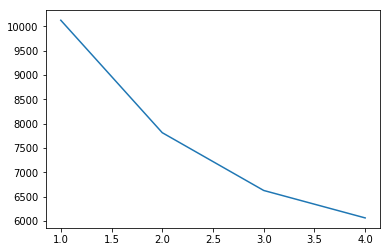

In [59]:
# Graphing the cost vs. the number of clusters

y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [60]:
# Running the algorithm for 2 clusters

km = KModes(n_clusters=2, init='Huang', n_init=50, verbose=1)
clus_kmodes = km.fit_predict(disc_var)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 8157.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 690, cost: 7805.0
Run 2, iteration: 2/100, moves: 365, cost: 7805.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 8644.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 1475, cost: 7741.0
Run 4, iteration: 2/100, moves: 0, cost: 7741.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 7997.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 6, iteration: 1/100, moves: 0, cost: 7997.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 7, iteration: 1/100, moves: 155, cost: 7816.0

In [61]:
# Saving the results in a data frame and checking the number of customers for each cluster

clus_kmodes=pd.DataFrame(clus_kmodes)
clus_kmodes.columns=['Clusters_kmodes']
clus_kmodes.groupby('Clusters_kmodes')['Clusters_kmodes'].count()

Clusters_kmodes
0    5524
1    1768
Name: Clusters_kmodes, dtype: int64

### 3.3 Hierarchical clustering

In [62]:
# Selecting the variables into a dataframe

CA_Norm = pd.DataFrame(cont_var_std, columns = cont_var.columns)

(0.0, 72920.0, 0.0, 147.34402032493352)

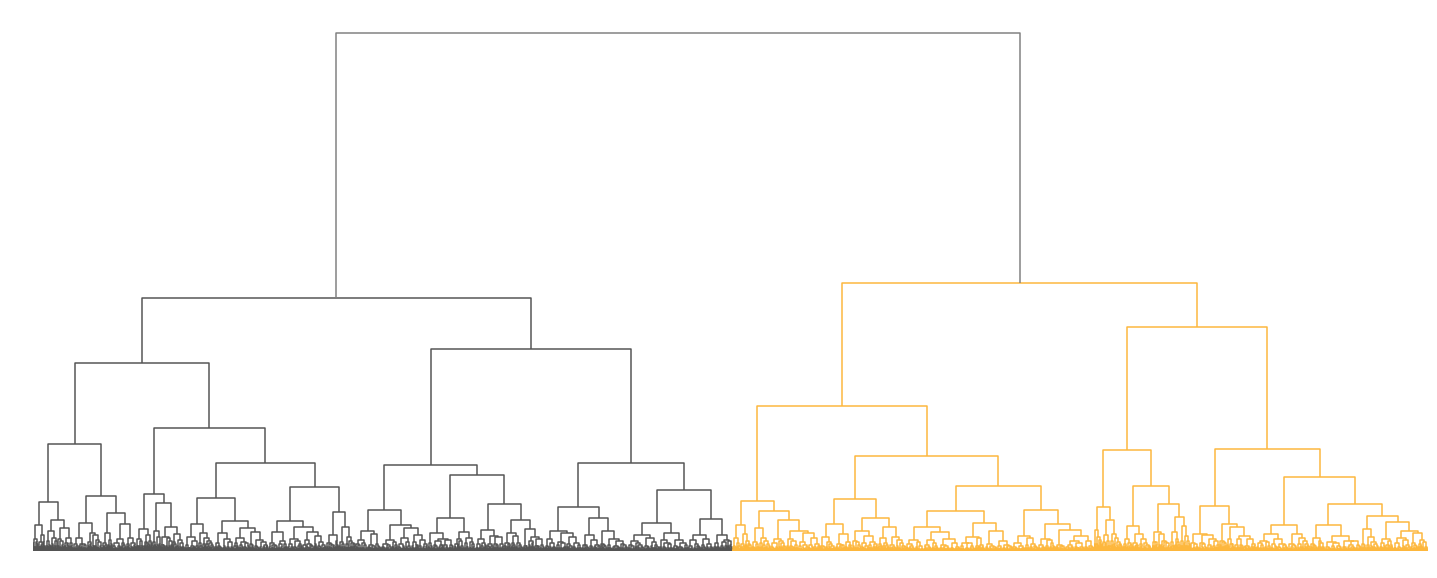

In [63]:
# Running the Dendrogram to select the number of clusters

Z = linkage(CA_Norm, 'ward')#single, complete
fig = plt.figure(figsize=(25, 10))

hierarchy.set_link_color_palette(['#545454','#fdb73d', '#f2685c' ,'#ff914d'])

dn = dendrogram(Z, above_threshold_color="grey")
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.axis('off')

In [64]:
# Implementing the agglomerative algorithm for 2 clusters

cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
cluster.fit_predict(cont_var_std)

array([0, 0, 0, ..., 0, 0, 0])

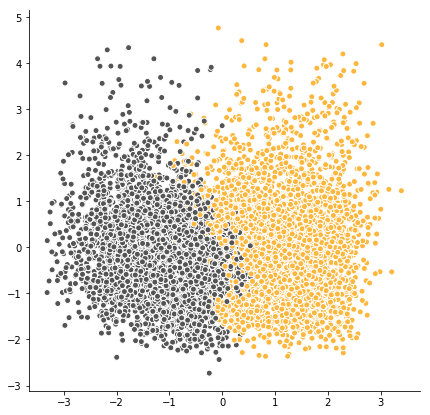

In [65]:
# Plotting the clusters

paletteColors = ['#545454','#fdb73d', '#f2685c' ,'#ff914d']
colorsCl = [paletteColors[i] for i in cluster.labels_]

plt.figure(figsize=(7, 7))
plt.scatter(PCA_components[0], PCA_components[1], c=colorsCl, cmap='rainbow', edgecolors='w')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [66]:
# Saving the results in a data frame and checking the number of customers for each cluster

clus_hier=pd.DataFrame(cluster.fit_predict(cont_var_std))
clus_hier.columns=['Clusters_Hier']
clus_hier.groupby('Clusters_Hier')['Clusters_Hier'].count()

Clusters_Hier
0    3634
1    3658
Name: Clusters_Hier, dtype: int64

### 3.4 DBSCAN clustering

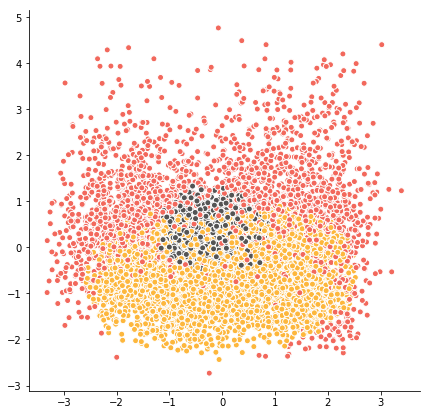

In [68]:
# Clustering the data

dbscan = DBSCAN(eps=1.13, min_samples = 1000)
clusters = dbscan.fit_predict(cont_var_std)

# Graphing the clusters

paletteColors = ['#fdb73d', '#545454', '#ff914d', '#f2685c']
colorsCl = [paletteColors[i] for i in dbscan.labels_]

plt.figure(figsize=(7, 7))
plt.scatter(PCA_components[0], PCA_components[1], c=colorsCl, cmap='rainbow', edgecolors='w')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('DBSCAN.png', transparent=True)

In [69]:
# Saving the results in a data frame and checking the number of customers for each cluster

clus_dbscan=pd.DataFrame(clusters)
clus_dbscan.columns=['Clusters_dbscan']
clus_dbscan.groupby('Clusters_dbscan')['Clusters_dbscan'].count()

Clusters_dbscan
-1    2574
 0    3893
 1     825
Name: Clusters_dbscan, dtype: int64

### 3.5 Cluster analysis and interpretation

In [72]:
# Merging cluster result in a single table

result=pd.concat([df, clus_kmeans, clus_kmodes, clus_hier, clus_dbscan], axis=1)

In [73]:
result.head()

CUST_ID  FIRST_PLCY_YR  BDAY_YR         EDUC_DGR  GROSS_MNT_SLRY  \
0        1         1985.0   1982.0  2 - High School          2177.0   
1        3         1991.0   1970.0        1 - Basic          2277.0   
2        4         1990.0   1981.0      3 - BSc/MSc          1099.0   
3        5         1986.0   1973.0      3 - BSc/MSc          1763.0   
4        6         1986.0   1956.0  2 - High School          2566.0   

   GEO_LIV_AREA  CHILDREN     CMV  CLAIMS_RATE  PRM_MOTOR  ...  \
0           1.0       1.0  380.97         0.39     375.85  ...   
1           3.0       0.0  504.67         0.28     206.15  ...   
2           4.0       1.0  -16.99         0.99     182.48  ...   
3           4.0       1.0   35.23         0.90     338.62  ...   
4           4.0       1.0  -24.33         1.00     440.75  ...   

   INACTIVE_HEALTH  INACTIVE_LIFE  INACTIVE_WORK_COMP  INACTIVE_ONE_LOB  \
0                0              0                   0                 0   
1                0              0                   0                 0   
2                0              0                   0                 0   
3                0              0                   0                 0   
4                0              0                   0                 0   

   INACTIVE_TOTAL  TOT_PRM  Clusters_kmeans  Clusters_kmodes  Clusters_Hier  \
0               0   665.56                2                1              0   
1               0   740.60                2                1              0   
2               0   600.68                1                0              0   
3               0   629.24                1                0              0   
4               0   589.12                1                0              1   

   Clusters_dbscan  
0               -1  
1               -1  
2               -1  
3                0  
4                0  

[5 rows x 28 columns]

In [74]:
result.groupby('Clusters_kmeans')['GROSS_MNT_SLRY', 'CMV', 'CLAIMS_RATE', 'PRM_MOTOR', 'PRM_HOUSE', 'PRM_HEALTH', 'PRM_LIFE', 'PRM_WORK_COMP', 'CUST_AGE','TIME_FRST_CNT', 'TOT_PRM'].mean()

GROSS_MNT_SLRY         CMV  CLAIMS_RATE   PRM_MOTOR  \
Clusters_kmeans                                                        
0                   3572.603271  192.243483     0.707130  289.929929   
1                   2227.311308    4.865179     0.959358  373.088585   
2                   2273.080494  431.580928     0.326746  382.538114   

                  PRM_HOUSE  PRM_HEALTH   PRM_LIFE  PRM_WORK_COMP   CUST_AGE  \
Clusters_kmeans                                                                
0                184.944885  191.424525  35.880555      34.990061  67.245350   
1                 95.586831  147.614653  23.670554      24.191661  43.667752   
2                128.725852  135.768444  22.707067      22.183965  44.382716   

                 TIME_FRST_CNT     TOT_PRM  
Clusters_kmeans                             
0                    29.814945  737.169955  
1                    28.776640  664.152285  
2                    28.600988  691.923442

In [75]:
result.groupby('Clusters_Hier')['GROSS_MNT_SLRY', 'CMV', 'CLAIMS_RATE', 'PRM_MOTOR', 'PRM_HOUSE', 'PRM_HEALTH', 'PRM_LIFE', 'PRM_WORK_COMP', 'CUST_AGE','TIME_FRST_CNT', 'TOT_PRM'].mean()

GROSS_MNT_SLRY         CMV  CLAIMS_RATE   PRM_MOTOR  \
Clusters_Hier                                                        
0                 2162.708861  186.715116     0.682760  376.143561   
1                 3463.524604  220.147376     0.668945  304.402097   

                PRM_HOUSE  PRM_HEALTH   PRM_LIFE  PRM_WORK_COMP   CUST_AGE  \
Clusters_Hier                                                                
0              104.578440  144.963668  22.948654      23.020729  42.445239   
1              181.166225  181.032993  34.261889      33.447810  65.375068   

               TIME_FRST_CNT     TOT_PRM  
Clusters_Hier                             
0                  28.516511  671.655052  
1                  29.822854  734.311014

In [76]:
result.groupby('Clusters_dbscan')['GROSS_MNT_SLRY', 'CMV', 'CLAIMS_RATE', 'PRM_MOTOR', 'PRM_HOUSE', 'PRM_HEALTH', 'PRM_LIFE', 'PRM_WORK_COMP', 'CUST_AGE','TIME_FRST_CNT', 'TOT_PRM'].mean()

GROSS_MNT_SLRY         CMV  CLAIMS_RATE   PRM_MOTOR  \
Clusters_dbscan                                                        
-1                  2712.188034  322.435412     0.538978  293.835855   
 0                  2904.188800   71.576550     0.861025  346.058479   
 1                  2717.185455  454.818873     0.228909  456.811418   

                  PRM_HOUSE  PRM_HEALTH   PRM_LIFE  PRM_WORK_COMP   CUST_AGE  \
Clusters_dbscan                                                                
-1               243.293629  175.908994  36.262226      35.552622  52.306527   
 0                97.203134  168.647537  26.982941      26.809663  55.588749   
 1                46.175152   96.584303  12.535564      12.275091  51.326061   

                 TIME_FRST_CNT     TOT_PRM  
Clusters_dbscan                             
-1                   28.318570  784.853326  
 0                   29.588492  665.701754  
 1                   29.867879  624.381527

In [77]:
result.pivot_table(values='CUST_ID',index='Clusters_Hier',columns='EDUC_DGR',aggfunc='count')

EDUC_DGR       1 - Basic  2 - High School  3 - BSc/MSc  4 - PhD
Clusters_Hier                                                  
0                    252             1171         1915      296
1                    254             1214         1909      281

In [78]:
result.pivot_table(values='CUST_ID',index='Clusters_Hier',columns='CHILDREN',aggfunc='count')

CHILDREN        0.0   1.0
Clusters_Hier            
0               264  3370
1              2046  1612

In [79]:
result.pivot_table(values='CUST_ID',index='Clusters_Hier',columns='GEO_LIV_AREA',aggfunc='count')

GEO_LIV_AREA    1.0  2.0  3.0   4.0
Clusters_Hier                      
0              1102  360  761  1411
1              1027  377  721  1533

In [81]:
result.pivot_table(values='CUST_ID',index='Clusters_kmodes',columns='Clusters_Hier',aggfunc='count')

Clusters_Hier       0     1
Clusters_kmodes            
0                3153  2371
1                 481  1287

In [82]:
result.pivot_table(values='CUST_ID',index='Clusters_kmodes',columns='Clusters_kmeans',aggfunc='count')

Clusters_kmeans     0     1     2
Clusters_kmodes                  
0                1913  1844  1767
1                1205   305   258

In [83]:
result.groupby('Clusters_kmodes')['GROSS_MNT_SLRY', 'CMV', 'CLAIMS_RATE', 'PRM_MOTOR', 'PRM_HOUSE', 'PRM_HEALTH', 'PRM_LIFE', 'PRM_WORK_COMP', 'CUST_AGE','TIME_FRST_CNT', 'TOT_PRM'].mean()

GROSS_MNT_SLRY         CMV  CLAIMS_RATE   PRM_MOTOR  \
Clusters_kmodes                                                        
0                   2685.580558  204.983668     0.667601  359.568081   
1                   3220.424208  198.807721     0.701538  279.499146   

                  PRM_HOUSE  PRM_HEALTH   PRM_LIFE  PRM_WORK_COMP   CUST_AGE  \
Clusters_kmodes                                                                
0                127.148715  153.297156  25.366175      25.111761  51.494207   
1                192.519570  193.553829  38.802404      38.061114  61.614253   

                 TIME_FRST_CNT     TOT_PRM  
Clusters_kmodes                             
0                    29.133056  690.491888  
1                    29.292986  742.436063

In [84]:
result.pivot_table(values='CUST_ID',index='Clusters_kmodes',columns='GEO_LIV_AREA',aggfunc='count')

GEO_LIV_AREA      1.0  2.0   3.0   4.0
Clusters_kmodes                       
0                1009  622  1279  2614
1                1120  115   203   330

In [85]:
result.pivot_table(values='CUST_ID',index='Clusters_kmodes',columns='EDUC_DGR',aggfunc='count')

EDUC_DGR         1 - Basic  2 - High School  3 - BSc/MSc  4 - PhD
Clusters_kmodes                                                  
0                      417             1166         3479      462
1                       89             1219          345      115

In [86]:
result.pivot_table(values='CUST_ID',index='Clusters_kmodes',columns='CHILDREN',aggfunc='count')

CHILDREN          0.0   1.0
Clusters_kmodes            
0                1019  4505
1                1291   477

In [87]:
result.pivot_table(values='CUST_ID',index='Clusters_kmodes',columns='INACTIVE_ONE_LOB',aggfunc='count')

INACTIVE_ONE_LOB     0     1    2   3
Clusters_kmodes                      
0                 3938  1246  299  41
1                 1486   245   34   3

In [88]:
result.pivot_table(values='CUST_ID',index='Clusters_kmodes',columns='INACTIVE_TOTAL',aggfunc='count')

INACTIVE_TOTAL      0     1
Clusters_kmodes            
0                3938  1586
1                1486   282

In [89]:
result.pivot_table(values='CUST_ID',index='Clusters_kmeans',columns='INACTIVE_TOTAL',aggfunc='count')

INACTIVE_TOTAL      0    1
Clusters_kmeans           
0                2635  483
1                1417  732
2                1372  653

In [90]:
result.groupby('Clusters_Hier')['GROSS_MNT_SLRY', 'CMV', 'CLAIMS_RATE', 'PRM_MOTOR', 'PRM_HOUSE', 'PRM_HEALTH', 'PRM_LIFE', 'PRM_WORK_COMP', 'CUST_AGE','TIME_FRST_CNT', 'TOT_PRM'].mean()

GROSS_MNT_SLRY         CMV  CLAIMS_RATE   PRM_MOTOR  \
Clusters_Hier                                                        
0                 2162.708861  186.715116     0.682760  376.143561   
1                 3463.524604  220.147376     0.668945  304.402097   

                PRM_HOUSE  PRM_HEALTH   PRM_LIFE  PRM_WORK_COMP   CUST_AGE  \
Clusters_Hier                                                                
0              104.578440  144.963668  22.948654      23.020729  42.445239   
1              181.166225  181.032993  34.261889      33.447810  65.375068   

               TIME_FRST_CNT     TOT_PRM  
Clusters_Hier                             
0                  28.516511  671.655052  
1                  29.822854  734.311014

In [91]:
result.pivot_table(values='GROSS_MNT_SLRY',index='Clusters_kmodes',columns='Clusters_kmeans',aggfunc='mean')

Clusters_kmeans            0            1            2
Clusters_kmodes                                       
0                3513.353894  2231.618764  2263.155631
1                3666.664730  2201.268852  2341.054264

In [92]:
result.pivot_table(values='CMV',index='Clusters_kmodes',columns='Clusters_kmeans',aggfunc='mean')

Clusters_kmeans           0          1           2
Clusters_kmodes                                   
0                188.830617   3.713221  432.512524
1                197.661585  11.829803  425.200581

In [93]:
result.pivot_table(values='CLAIMS_RATE',index='Clusters_kmodes',columns='Clusters_kmeans',aggfunc='mean')

Clusters_kmeans         0         1         2
Clusters_kmodes                              
0                0.703508  0.960694  0.322864
1                0.712880  0.951279  0.353333

In [94]:
result.pivot_table(values='CUST_AGE',index='Clusters_kmodes',columns='Clusters_kmeans',aggfunc='mean')

Clusters_kmeans          0          1          2
Clusters_kmodes                                 
0                65.828019  43.672451  44.138653
1                69.495436  43.639344  46.054264

In [95]:
result.pivot_table(values='TOT_PRM',index='Clusters_kmodes',columns='Clusters_kmeans',aggfunc='mean')

Clusters_kmeans           0           1           2
Clusters_kmodes                                    
0                721.338458  659.786426  689.140096
1                762.303278  690.547836  710.986124

In [96]:
result.pivot_table(values='PRM_MOTOR',index='Clusters_kmodes',columns='Clusters_kmeans',aggfunc='mean')

Clusters_kmeans           0           1           2
Clusters_kmodes                                    
0                315.455646  380.360922  385.626423
1                249.406531  329.120754  361.386783

In [97]:
result.pivot_table(values='PRM_HOUSE',index='Clusters_kmodes',columns='Clusters_kmeans',aggfunc='mean')

Clusters_kmeans           0           1           2
Clusters_kmodes                                    
0                164.797909   90.139479  125.010696
1                216.929253  128.520984  154.170349

In [98]:
result.pivot_table(values='PRM_HEALTH',index='Clusters_kmodes',columns='Clusters_kmeans',aggfunc='mean')

Clusters_kmeans           0           1           2
Clusters_kmodes                                    
0                177.651291  145.315043  135.260685
1                213.290249  161.517869  139.246008

In [99]:
result.pivot_table(values='PRM_LIFE',index='Clusters_kmodes',columns='Clusters_kmeans',aggfunc='mean')

Clusters_kmeans          0          1          2
Clusters_kmodes                                 
0                32.024219  21.774637  21.906050
1                42.002689  35.133082  28.193101

In [100]:
result.pivot_table(values='PRM_WORK_COMP',index='Clusters_kmodes',columns='Clusters_kmeans',aggfunc='mean')

Clusters_kmeans          0          1          2
Clusters_kmodes                                 
0                31.409394  22.196345  21.336242
1                40.674556  36.255148  27.989884

In [101]:
result.pivot_table(values='CUST_ID',index='Clusters_kmeans',columns='GEO_LIV_AREA',aggfunc='count')

GEO_LIV_AREA     1.0  2.0  3.0   4.0
Clusters_kmeans                     
0                863  321  626  1308
1                640  220  435   854
2                626  196  421   782

In [102]:
result.pivot_table(values='CUST_ID',index='Clusters_kmeans',columns='EDUC_DGR',aggfunc='count')

EDUC_DGR         1 - Basic  2 - High School  3 - BSc/MSc  4 - PhD
Clusters_kmeans                                                  
0                      216             1043         1627      232
1                      140              720         1113      176
2                      150              622         1084      169

In [103]:
result.pivot_table(values='CUST_ID',index='Clusters_kmeans',columns='CHILDREN',aggfunc='count')

CHILDREN          0.0   1.0
Clusters_kmeans            
0                1973  1145
1                 172  1977
2                 165  1860

In [104]:
result.pivot_table(values='CUST_ID',index='Clusters_kmeans',columns='INACTIVE_TOTAL',aggfunc='count')

INACTIVE_TOTAL      0    1
Clusters_kmeans           
0                2635  483
1                1417  732
2                1372  653

### 3.6 Decision Tree

In [105]:
# Decision Tree

#split dataset in features and target variable
#X=pd.concat([cont_var[['GROSS_MNT_SLRY', 'CMV', 'CUST_AGE']], disc_var], axis=1)
X=df[['EDUC_DGR', 'GROSS_MNT_SLRY', 'CHILDREN', 'CMV', 'CUST_AGE']]
y=df[['INACTIVE_TOTAL']]

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'EDUC_DGR'. 
X['EDUC_DGR']= label_encoder.fit_transform(X['EDUC_DGR']) 

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.676416819012797


/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


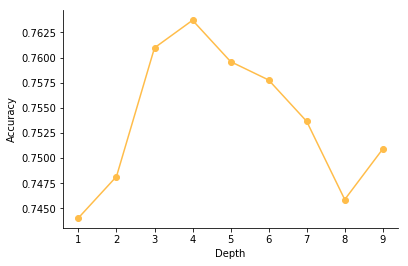

<Figure size 432x288 with 0 Axes>

In [106]:
# List of values to try for max_depth:
max_depth_range = range(1, 10)
# List to store the average RMSE for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth,
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)
    
plt.figure(figsize=(6, 4)) 
plt.plot(max_depth_range, accuracy, '-o', color='#ffbd4a')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.xticks(ks)
plt.show()

plt.savefig('DTDepth.png', transparent=True)

In [107]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7641681901279708


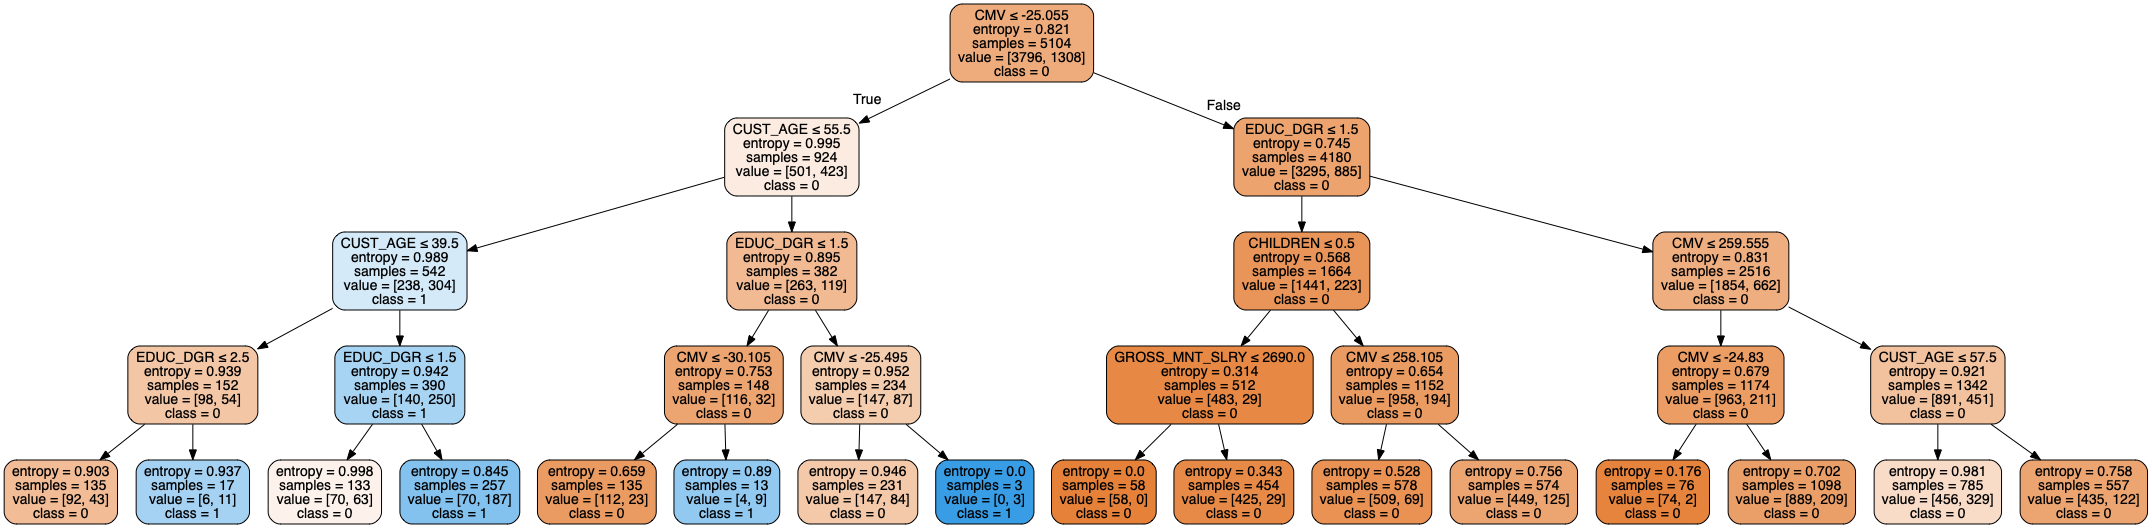

In [108]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Dec_Tree.png')
Image(graph.create_png())